In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [ ]:
import mediapipe as mp
import cv2
from processors import image_processor
import PIL
import numpy as np

In [19]:
image_path = "face_detection.png"

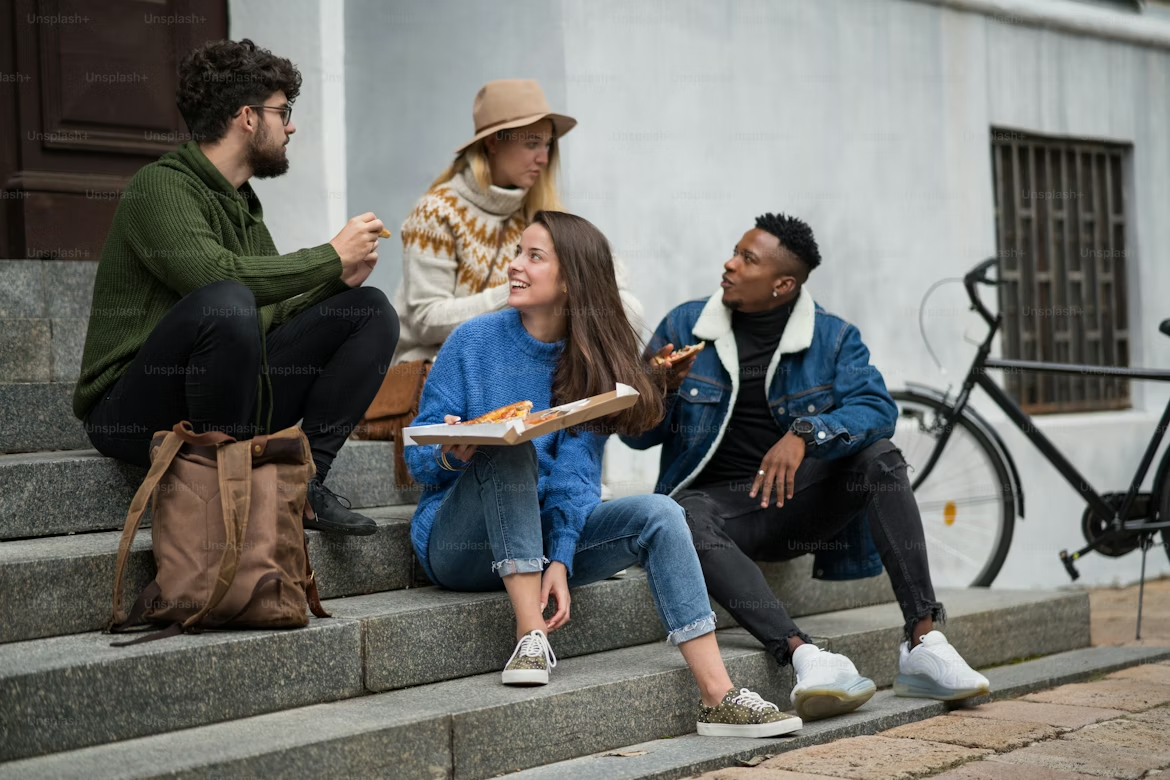

In [21]:
PIL.Image.open(image_path)

In [22]:
image = image_processor.ImageProcessor(image_path=image_path)

In [ ]:
image_result = image.process()
PIL_Image = image_result["image"]

In [ ]:
mp_image = np.array(PIL_Image)

In [35]:
import mediapipe as mp
import cv2
import numpy as np

mp_face = mp.solutions.face_detection
mp_draw = mp.solutions.drawing_utils

with mp_face.FaceDetection(
    model_selection=1, 
    min_detection_confidence=0.5
) as face_detection:

    results = face_detection.process(mp_image)

    if results.detections:
        for detection in results.detections:
            mp_draw.draw_detection(mp_image, detection)


AttributeError: module 'mediapipe' has no attribute 'solutions'

In [ ]:
cv2.imshow(
    "Faces",
    cv2.cvtColor(mp_image, cv2.COLOR_RGB2BGR)
)
cv2.waitKey(0)
cv2.destroyAllWindows()
